In [1]:
# Definición de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [1]:
datos = pd.read_csv(r'C:\Users\sebas andoney\cliente_tienda.csv', low_memory=False)
datos.head()

NameError: name 'pd' is not defined

In [3]:
# 2. Exploración de datos
print("\nDescripción de los datos:")
print(datos.describe())


Descripción de los datos:
       CustomerID        Edad  Ingresos Anuales ($)  \
count  200.000000  200.000000            200.000000   
mean   100.500000   38.850000             60.560000   
std     57.879185   13.969007             26.264721   
min      1.000000   18.000000             15.000000   
25%     50.750000   28.750000             41.500000   
50%    100.500000   36.000000             61.500000   
75%    150.250000   49.000000             78.000000   
max    200.000000   70.000000            137.000000   

       Porcentajde de gastos (1-100)  
count                     200.000000  
mean                       50.200000  
std                        25.823522  
min                         1.000000  
25%                        34.750000  
50%                        50.000000  
75%                        73.000000  
max                        99.000000  


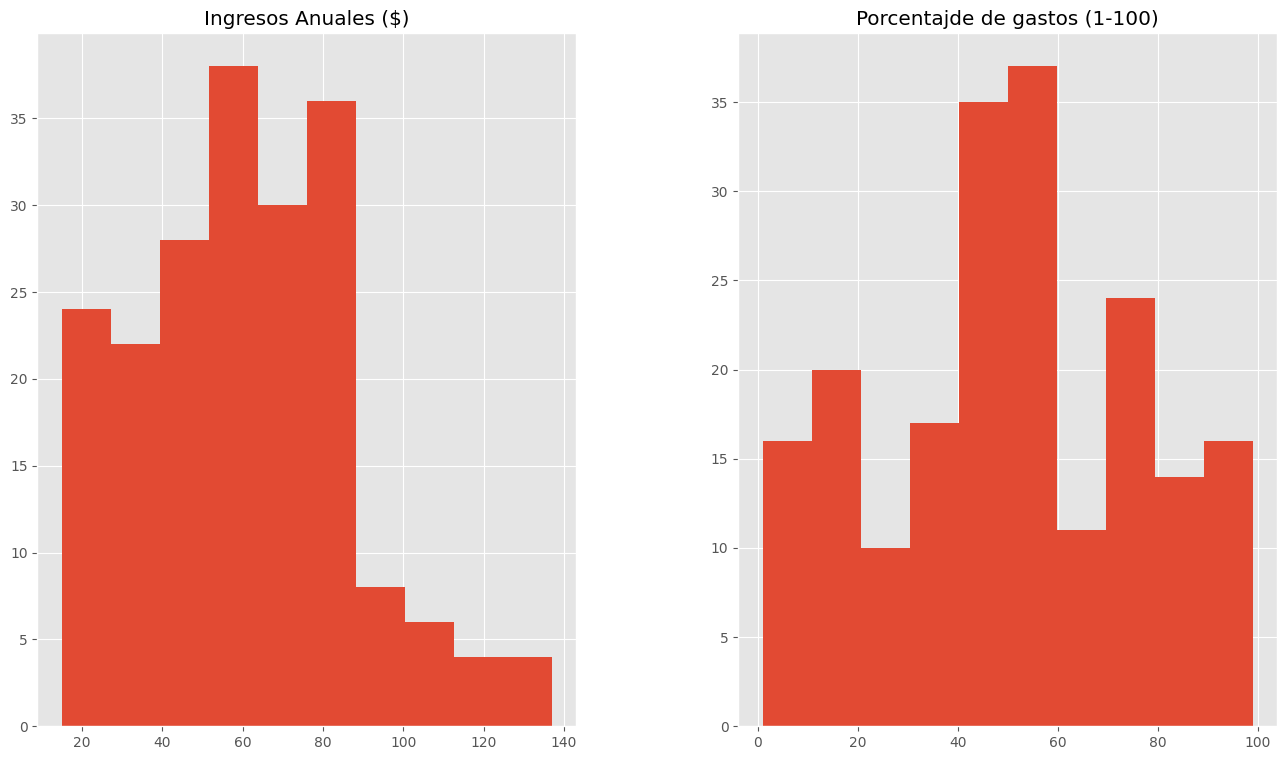

In [6]:
# Visualización de las columnas seleccionadas
columnas_interes = ["Ingresos Anuales ($)", "Porcentajde de gastos (1-100)"]
datos[columnas_interes].hist()
plt.show()

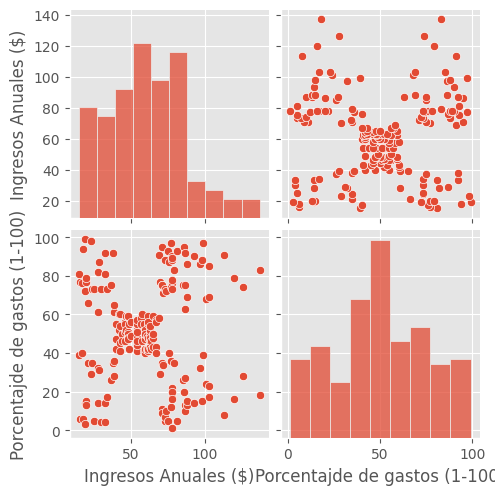

In [7]:
# 3. Visualización combinada
sb.pairplot(datos[columnas_interes])
plt.show()

In [8]:
# 4. Definir las entradas
X = np.array(datos[columnas_interes])
print(f"Forma de los datos de entrada: {X.shape}")

Forma de los datos de entrada: (200, 2)


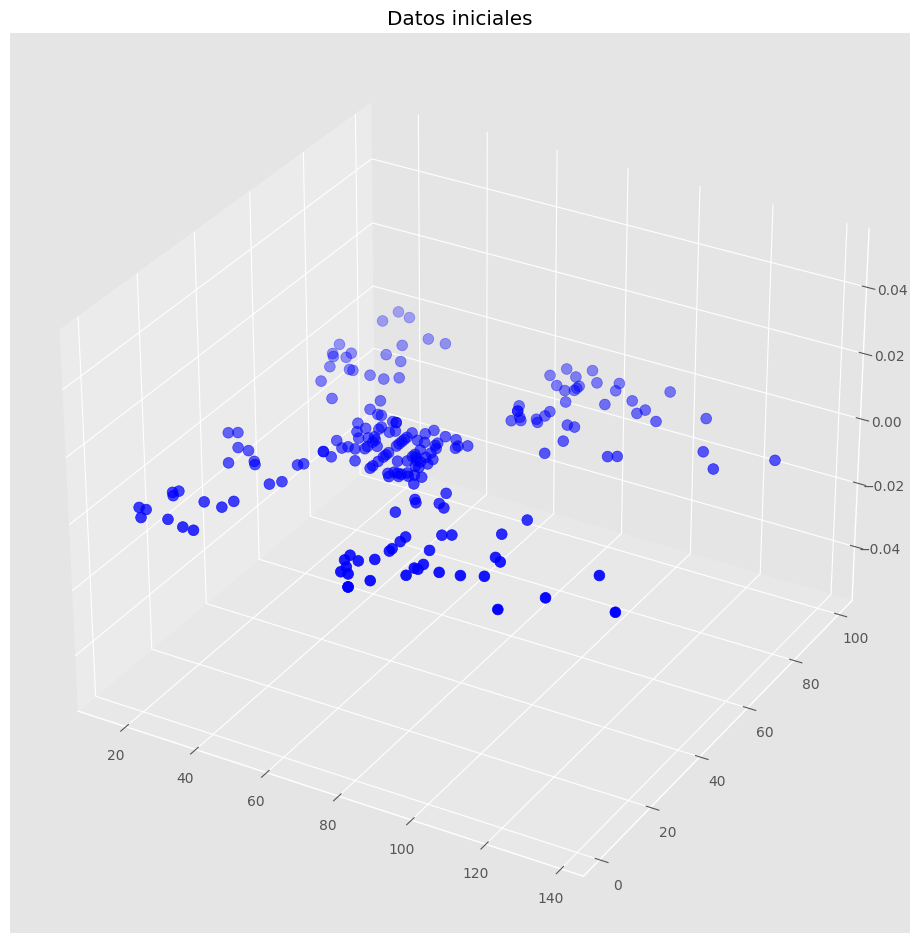

In [9]:
# Visualización inicial 3D (si fuera necesario incluir más dimensiones)
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], c='blue', s=60)
plt.title("Datos iniciales")
plt.show()


In [2]:
# 5. Obtener el valor óptimo de K usando la técnica del codo
Nc = range(1, 10)
kmeans_models = [KMeans(n_clusters=i, random_state=42) for i in Nc]
scores = [model.fit(X).inertia_ for model in kmeans_models]

plt.plot(Nc, scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Curva del codo')
plt.show()

NameError: name 'KMeans' is not defined

In [3]:
# 6. Ejecutar K-Means con el número óptimo de clusters 
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("\nCentroides de los clusters:")
print(centroids)

NameError: name 'KMeans' is not defined

In [4]:
# 7. Visualización de los clusters
colores = ['red', 'green', 'blue']
asignar = [colores[label] for label in labels]

NameError: name 'labels' is not defined

In [5]:
# Scatter plot en 2D
plt.scatter(X[:, 0], X[:, 1], c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=1000)
plt.title("Clusterización en 2D")
plt.xlabel("Ingresos anuales")
plt.ylabel("Porcentaje de gastos")
plt.show()

NameError: name 'plt' is not defined

In [6]:
# 8. Análisis de los resultados
datos["Cluster"] = labels
print("\nCantidad de elementos por cluster:")
print(datos["Cluster"].value_counts())

NameError: name 'labels' is not defined

In [7]:
# 13. Estadísticas descriptivas por clúster
print("\nEstadísticas descriptivas por cluster:")
print(datos.groupby("Cluster")[["Edad", "Ingresos Anuales ($)", "Porcentajde de gastos (1-100)"]].mean())


Estadísticas descriptivas por cluster:


NameError: name 'datos' is not defined

In [8]:
# 9. Clasificación de una nueva muestra
X_new = np.array([[44, 50]])  # Ejemplo: ingreso anual y porcentaje de gasto
new_label = kmeans.predict(X_new)
print(f"\nLa nueva muestra pertenece al cluster: {new_label[0]}")

NameError: name 'np' is not defined

In [9]:
# Agrupar por edad y cluster, contando las actividades o registros
for cluster_id in datos["Cluster"].unique():
    # Filtramos los datos para el cluster actual
    group_referrer_index = datos["Cluster"] == cluster_id
    group_referrals = datos[group_referrer_index]
    
    # Agrupamos por 'Edad' y contamos las entradas
    diversidadGrupo = group_referrals.groupby('Edad').size().reset_index(name='Cantidad')
    
    # Mostrar los resultados para el cluster actual
    print(f"\nActividad de ventas para el Cluster {cluster_id}:")
    print(diversidadGrupo)

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.bar(diversidadGrupo['Edad'], diversidadGrupo['Cantidad'], color='blue', alpha=0.7)
    plt.title(f"Actividad de ventas por Edad - Cluster {cluster_id}")
    plt.xlabel("Edad")
    plt.ylabel("Cantidad de ventas/actividades")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


NameError: name 'datos' is not defined